In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import flare_prob

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [31]:
dur = 0.05 # duration to simulate (in years)

ffd_alpha = 0 # the log flare frequency amplitude (turn this knob to increase/decrease total flare rate)
ffd_beta = -1.0 # ffd slope

ffd_min = -1 # how far down in the log(Equiv-Dur) FFD to model
dt = 0.1/24./60. # do 0.1-min cadence

# s_time1, s_flux1 = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=0.5, ffd_beta=-1, 
#                                       ffd_min=-2, dt=dt)

# s_time2, s_flux2 = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=0, ffd_beta=-2, 
#                                       ffd_min=-1.5, dt=dt)

Making 262800 epochs
Simulating 5767 flares
Making 262800 epochs
Simulating 18250 flares


In [32]:
# dfout1 = pd.DataFrame(data={'time':s_time1, 'flux':s_flux1})
# dfout1.to_csv('lc1.csv')

# dfout2 = pd.DataFrame(data={'time':s_time2, 'flux':s_flux2})
# dfout2.to_csv('lc2.csv')

In [ ]:
# read in previously created lc1/lc2 files


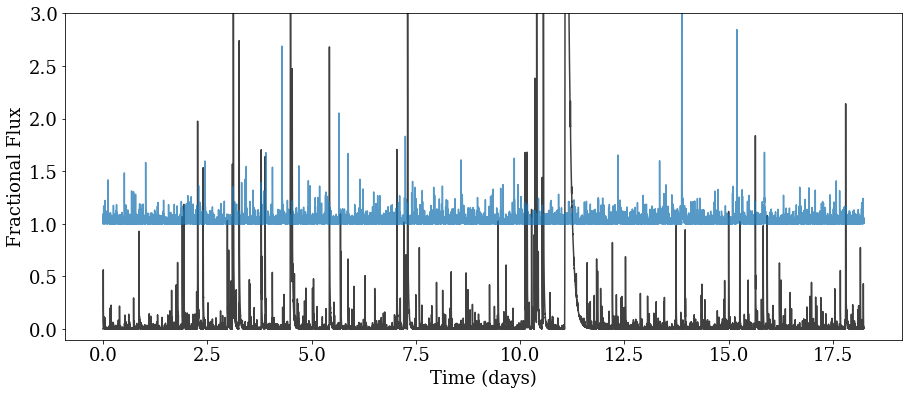

In [35]:
plt.figure(figsize=(15,6))
plt.plot(s_time1, s_flux1, alpha=0.75, c='black')
plt.plot(s_time2, s_flux2 + 1, alpha=0.75)

plt.ylim(-0.1,3)
plt.xlabel('Time (days)')
plt.ylabel('Fractional Flux')
plt.savefig('Fakeflares_try1.png', dpi=150, rasterized=True, bbox_inches='tight', pad_inches=0.5)

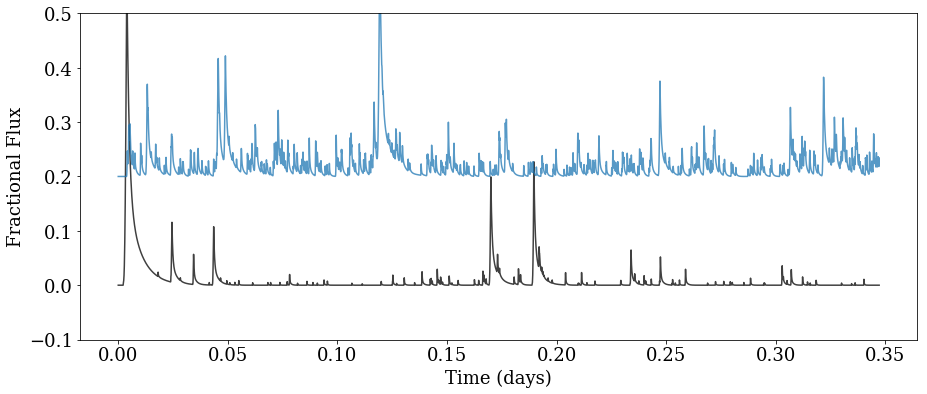

In [36]:
plt.figure(figsize=(15,6))
plt.plot(s_time1[0:5000], s_flux1[0:5000], alpha=0.75, c='black')
plt.plot(s_time2[0:5000], s_flux2[0:5000]+0.2, alpha=0.75)
plt.ylim(-0.1,.5)
plt.xlabel('Time (days)')
plt.ylabel('Fractional Flux')

(0, 0.5)

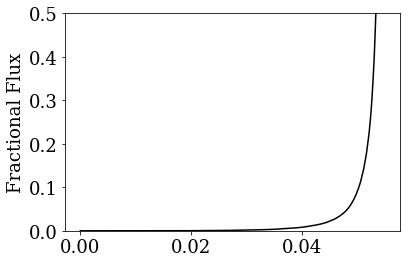

In [100]:
plt.plot(np.linspace(0,1,len(s_time1)) / max(s_time1), s_flux1[np.argsort(s_flux1)], c='black')
# plt.plot(np.linspace(0,1,len(s_time2)), s_flux1[np.argsort(s_flux2)])
plt.ylabel('Fractional Flux')
plt.ylim(0,0.5)

In [27]:
from astropy.stats import lombscargle, LombScargle

In [37]:
frequency1, power1 = LombScargle(s_time1, s_flux1).autopower()
frequency2, power2 = LombScargle(s_time2, s_flux2).autopower()

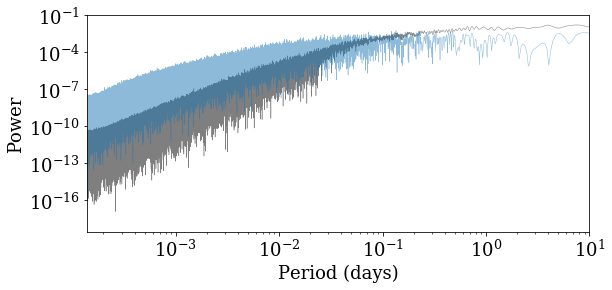

In [39]:
plt.figure(figsize=(9,4))
plt.plot(1./frequency1, power1, lw=0.5, c='black', alpha=0.5)
plt.plot(1./frequency2, power2, lw=0.5, alpha=0.5)

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.xlim(dt*2, 10);

# An experiment in the powerspectrum

[-2.5 -2.  -1. ]
[-1.25 -1.5  -2.  ]
Making 26280 epochs
Simulating 24327 flares


/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


Making 26280 epochs
Simulating 18250 flares
Making 26280 epochs
Simulating 1825 flares


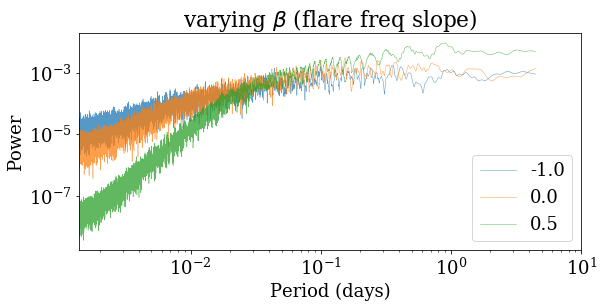

In [134]:
beta_i = np.array([-2.5, -2, -1])
print(beta_i)
min_i = -2.5 - beta_i/2.
print(min_i)

plt.figure(figsize=(9,4))
for k in range(len(beta_i)):
    s_timei, s_fluxi = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=0, ffd_beta=beta_i[k],
                                          ffd_min=min_i[k], dt=dt*10)
    frequencyi, poweri = LombScargle(s_timei, s_fluxi).autopower()

#     plt.plot(1./frequencyi, poweri, lw=0.5, alpha=0.75, label=str(beta_i[k]))
    plt.plot(1./frequencyi, pd.rolling_mean(poweri,21), lw=0.5, alpha=0.75, label=str(alpha_i[k]))


plt.legend()
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.title(r'varying $\beta$ (flare freq slope)')
plt.xlim(dt*2*10, 10);
plt.savefig('vary_beta.png', dpi=150, rasterized=True, bbox_inches='tight', pad_inches=0.5)

[-1.   0.   0.5]
Making 26280 epochs
Simulating 565 flares


/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


Making 26280 epochs
Simulating 5767 flares
Making 26280 epochs
Simulating 18250 flares


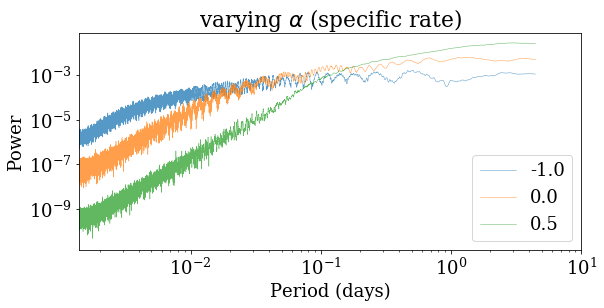

In [132]:
alpha_i = np.array([-1, 0, 0.5])
print(alpha_i)

plt.figure(figsize=(9,4))
for k in range(len(alpha_i)):
    s_timei, s_fluxi = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=alpha_i[k], ffd_beta=-1,
                                          ffd_min=-2.5, dt=dt*10)
    frequencyi, poweri = LombScargle(s_timei, s_fluxi).autopower()

#     plt.plot(1./frequencyi, poweri, lw=0.5, alpha=0.75, label=str(alpha_i[k]))
    plt.plot(1./frequencyi, pd.rolling_mean(poweri,21), lw=0.5, alpha=0.75, label=str(alpha_i[k]))
    
plt.legend()
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.title(r'varying $\alpha$ (specific rate)')
plt.xlim(dt*2*10, 10);
plt.savefig('vary_alpha.png', dpi=150, rasterized=True, bbox_inches='tight', pad_inches=0.5)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


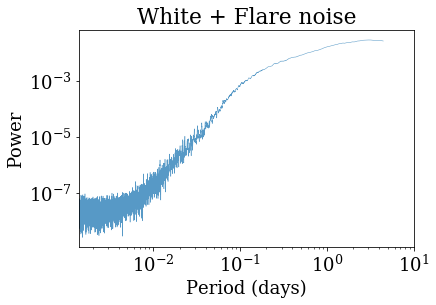

In [133]:
frequencyi1, poweri1 = LombScargle(s_timei, s_fluxi  + np.random.randn(len(s_fluxi))*0.1).autopower()

plt.plot(1./frequencyi1, pd.rolling_mean(poweri1,21), lw=0.5, alpha=0.75, label=str(alpha_i[k]))

# plt.legend()
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.title('White + Flare noise')
plt.xlim(dt*2*10, 10);
plt.savefig('flare_whitenoise.png', dpi=150, rasterized=True, bbox_inches='tight', pad_inches=0.5)

# play with adding Gaussian noise

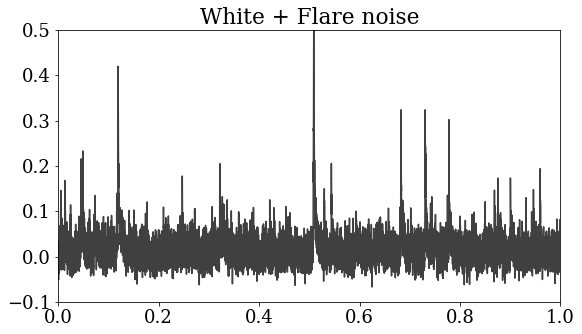

In [180]:
somenoise = np.random.randn(len(s_flux1))*0.02

plt.figure(figsize=(9,5))
plt.plot(s_time2, s_flux2 + somenoise, alpha=0.75, c='black')
plt.ylim(-0.1,.5)
plt.xlim(0,1)
plt.title('White + Flare noise')
plt.savefig('flarelc_whitenoise.png', dpi=150, rasterized=True, bbox_inches='tight', pad_inches=0.5)
# plt.plot(s_time2, s_flux2 + 1, alpha=0.75)
# plt.plot(s_timei, s_fluxi)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


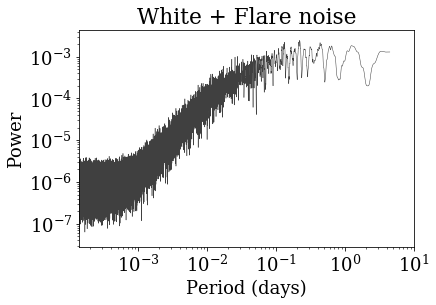

In [181]:
frequencyi1, poweri1 = LombScargle(s_time2, s_flux2 + somenoise).autopower()

plt.plot(1./frequencyi1, pd.rolling_mean(poweri1,21), lw=0.5, alpha=0.75, c='k')

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.title('White + Flare noise')
plt.xlim(dt*2, 10);



**QUESTIONS:**

 1) How does this look after we "Find" the flares w/ GP (or other approahces)?
 
 2) Can we recover a small planet in this data, above the Gaussian noise floor?
 
 
**Hogg mentions:**
this red noise should also show up as skew 

# FFT Powerspectrum

In [178]:
# if this works, it's from Jean McKeever

import scipy.fftpack as ft

def get_power(time,f):
    # convert to into seconds
    time=time*60*60*24
    time=time-time[0]
    dnu=1/time[-1]*1e6
    # find nearest higher power of 2
    n=len(time)
    noct=int(np.log(n)/np.log(2))+1
    nfft=2**(noct)
    trans=ft.fft(f,nfft)[0:nfft/2]/(nfft/2)
    power=(abs(trans)**2)/dnu ##ppm**2/uHz
    dt=np.mean(np.diff(time))
    freqs=np.arange(nfft/2)/dt/nfft/1e-6
    return freqs,power

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


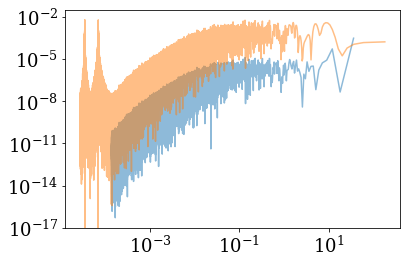

In [179]:
# frequencyi1, poweri1 = LombScargle(s_time2, s_flux2 + somenoise).autopower()

FFT_freq, FFT_pwr = get_power(s_time2, s_flux2)

plt.plot(1e6/(FFT_freq)/24./60./60., FFT_pwr, alpha=0.5)
plt.plot(1./frequency2, power2, alpha=0.5)
plt.xscale('log')
plt.yscale('log')

look @ MOST

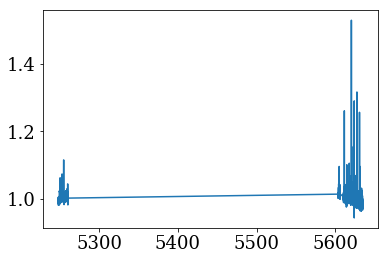

In [183]:
most = pd.read_table('/Users/james/Dropbox/research_projects/most-flares-kipping/alldata.dat', 
                     delim_whitespace=True, names=['time','flux'])
plt.plot(most['time'], most['flux'])

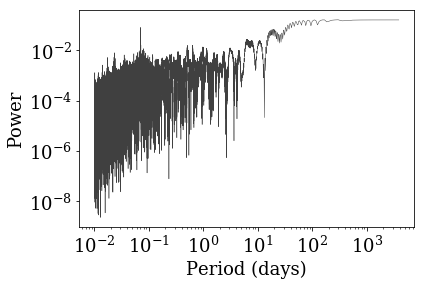

In [184]:
freq_most, pwr_most = LombScargle(most['time'], most['flux']).autopower()

plt.plot(1./freq_most, pwr_most, lw=0.5, alpha=0.75, c='k')

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
